In [1]:
import numpy as np
import pandas as pd

from functions import *

In [2]:
df_clients_to_predict = pd.read_csv(r"datasets\finals_datasets\df_clients_to_predict.csv")

In [3]:
df_analysis(df_clients_to_predict, "df_clients_to_predict", analysis_type="header")


Analysis Header of df_clients_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 48744 rows and 508 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 188.9 MB


In [4]:
df_clients_to_predict = memory_optimization(df_clients_to_predict)

In [5]:
df_analysis(df_clients_to_predict, "df_clients_to_predict", analysis_type="header")


Analysis Header of df_clients_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 48744 rows and 508 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 76.9 MB


In [9]:
df_current_clients = pd.read_csv(r"datasets\finals_datasets\df_current_clients.csv")

In [10]:
df_current_clients = memory_optimization(df_current_clients)

In [11]:
df_analysis(df_current_clients, "df_current_clients", analysis_type="header")


Analysis Header of df_current_clients dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 509 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 459.8 MB


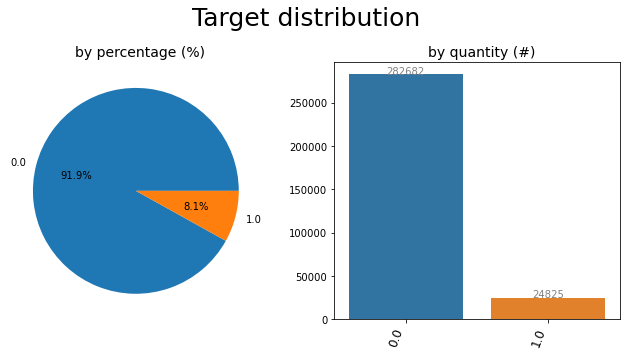

In [12]:
barplot_and_pie(df_current_clients["TARGET"], "Target distribution", " ")

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. Splitting data</h2>
</div>

In [13]:
from sklearn.model_selection import train_test_split

<div class="alert alert-block alert-info">
    <p>First of all, let's identify the training columns in the dataset
   </p>
</div>

In [14]:
NOT_TRAINING_COLUMNS  = ["TARGET", "SK_ID_CURR", "SK_ID_BUREAU", "SK_ID_PREV", "index"] 
TRAINING_COLUMNS = [col for col in df_current_clients.columns if col not in NOT_TRAINING_COLUMNS]

<div class="alert alert-block alert-info">
    <p>Let's split the all data
   </p>
</div>

In [15]:
X = df_current_clients[TRAINING_COLUMNS]

In [16]:
y_target = df_current_clients.loc[:,"TARGET"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.20, stratify=y_target, random_state=42)

In [18]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("---------------------")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (246005, 506)
y_train: (246005,)
---------------------
X_test: (61502, 506)
y_test: (61502,)


<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">10. Feature selection</h2>
</div>

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

In [20]:
fs = SelectKBest(score_func=f_classif, k=150)

In [21]:
fs.fit(X_train, y_train)

C:\Users\Samir\miniconda3\envs\p7\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [223 228 244 278 286 289 315 320 325 335 348 377 383 387 396 408 414 478] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Samir\miniconda3\envs\p7\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=150)

In [22]:
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [23]:
print("X_train:\t {}".format(X_train.shape))
print("X_train_fs:\t {}".format(X_train_fs.shape))
print("----------------------------------")
print("X_test:\t\t {}".format(X_test.shape))
print("X_test_fs:\t {}".format(X_test_fs.shape))

X_train:	 (246005, 506)
X_train_fs:	 (246005, 150)
----------------------------------
X_test:		 (61502, 506)
X_test_fs:	 (61502, 150)


<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.2. LightGBM</h3>
</div>

In [24]:
from lightgbm import LGBMClassifier

In [25]:
clf_lgbm_cw = LGBMClassifier(max_depth=9, n_estimators=8000, num_leaves=32, class_weight="balanced", learning_rate=0.02,
                             colsample_bytree=0.9497036, subsample=0.8715623,
                             reg_alpha=0.041545473, reg_lambda=0.0735294,
                             min_split_gain=0.0222415, min_child_weight=39.3259775,
                             random_state=42, n_jobs=-1)

In [26]:
clf_lgbm_cw.fit(X_train_fs, y_train)

LGBMClassifier(class_weight='balanced', colsample_bytree=0.9497036,
               learning_rate=0.02, max_depth=9, min_child_weight=39.3259775,
               min_split_gain=0.0222415, n_estimators=8000, num_leaves=32,
               random_state=42, reg_alpha=0.041545473, reg_lambda=0.0735294,
               subsample=0.8715623)

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">12. Final re-training</h2>
</div>

In [36]:
import joblib

<div class="alert alert-block alert-info">
    <p>We are going to apply our Feature Selection on the whole dataset excluding target variable</p>
</div>

In [27]:
X_fs = fs.transform(X)

<div class="alert alert-block alert-info">
    <p>Let's take advantages and save the features selected as dataset</p>
</div>

In [30]:
cols = fs.get_support(indices=True)

In [31]:
df_X = X.iloc[:, cols]

In [33]:
df_X.shape

(307507, 150)

In [34]:
#https://stackoverflow.com/questions/38154040/save-dataframe-to-csv-directly-to-s3-python
df_X.to_csv("datasets/finals_datasets/df_current_clients_feature_seleted.csv", index=False)

<div class="alert alert-block alert-info">
    <p>Now, we can make the modelisation</p>
</div>

In [28]:
clf_lgbm_cw.fit(X_fs, y_target)

LGBMClassifier(class_weight='balanced', colsample_bytree=0.9497036,
               learning_rate=0.02, max_depth=9, min_child_weight=39.3259775,
               min_split_gain=0.0222415, n_estimators=8000, num_leaves=32,
               random_state=42, reg_alpha=0.041545473, reg_lambda=0.0735294,
               subsample=0.8715623)

In [37]:
# Saving the model based on the best parameters
joblib.dump(clf_lgbm_cw, "models/model_{version}.pkl".format(version=20220217))

['models/model_20220217.pkl']

<div style="background-color: #506AB9;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">TESTING THE MODEL</h1>
</div>

In [41]:
model = joblib.load("models\model_20220217.pkl")

In [38]:
df_clients_to_predict = pd.read_csv(r"datasets\finals_datasets\df_clients_to_predict.csv")

In [39]:
NOT_TRAINING_COLUMNS  = ["TARGET", "SK_ID_CURR", "SK_ID_BUREAU", "SK_ID_PREV", "index"] 
TRAINING_COLUMNS = [col for col in df_current_clients.columns if col not in NOT_TRAINING_COLUMNS]

In [40]:
df_clients_to_predict = df_clients_to_predict[TRAINING_COLUMNS]

In [42]:
clients_to_predict_fs = fs.transform(df_clients_to_predict)

In [43]:
result = model.predict(clients_to_predict_fs)

In [45]:
print('Total occurences of "0" in array: ', result.tolist().count(0))
print('Total occurences of "1" in array: ', result.tolist().count(1))

Total occurences of "0" in array:  41022
Total occurences of "1" in array:  7722


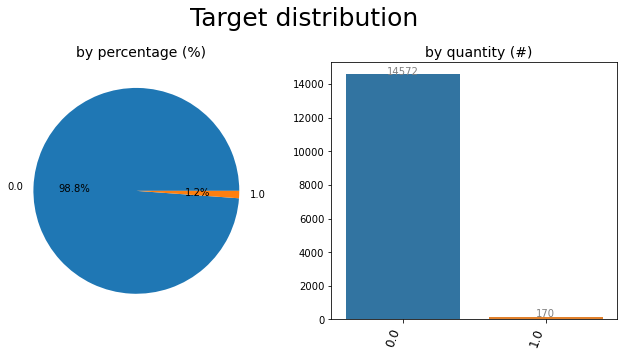

In [22]:
barplot_and_pie(df_example_copy["TARGET"], "Target distribution", " ")